Подключаем библиотеки

In [587]:
# 1. Основные библиотеки
import numpy as np
import pandas as pd
import pickle   # сохранение модели

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


# 2. Разделение датасета
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

# 3. Модели
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

# 4. Метрики качества
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

# 5. Для визуализации внешних картинок в ноутбуке
from IPython.display import Image

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

matplotlib.rcParams.update({'font.size': 14})

Прописываем путь к датасету. Кладем его в переменную df

In [588]:
DATASET_PATH = './train.csv'
PREPARED_DATASET_PATH = './train_prepared.csv'

In [589]:
df = pd.read_csv(DATASET_PATH, sep=',')
df.head(5)

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
0  11809          27    3.0  115.027311         NaN           10.0      4   
1   3013          22    1.0   39.832524   23.169223            8.0      7   
2   8215           1    3.0   78.342215   47.671972           10.0      2   
3   2352           1    1.0   40.409907         NaN            1.0     10   
4  13866          94    2.0   64.285067   38.562517            9.0     16   

   HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  Social_2  \
0        10.0       2014   0.075424         B         B        11      3097   
1         8.0       1966   0.118537         B         B        30      6207   
2        17.0       1988   0.025609         B         B        33      5261   
3        22.0       1977   0.007122         B         B         1       264   
4        16.0       1972   0.282798         B         B        33      8667   

   Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2          Price  
0         0           NaN            0        0       B  305018.871089  
1         1        1183.0            1        0       B  177734.553407  
2         0         240.0            3        1       B  282078.720850  
3         0           NaN            0        1       B  168106.007630  
4         2           NaN            0        6       B  343995.102962

In [590]:
df.shape

(10000, 20)

In [591]:
df.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

Меняем тип данных айдишника на строковый

In [592]:
df['Id'] = df['Id'].astype(str)
df.rename(columns={'Helthcare_2': 'Healthcare_2'}, inplace=True) #испарвляю опечатку

Смотрим информацию по датасету

In [593]:
df.describe()

DistrictId         Rooms        Square   LifeSquare  KitchenSquare  \
count  10000.000000  10000.000000  10000.000000  7887.000000   10000.000000   
mean      50.400800      1.890500     56.315775    37.199645       6.273300   
std       43.587592      0.839512     21.058732    86.241209      28.560917   
min        0.000000      0.000000      1.136859     0.370619       0.000000   
25%       20.000000      1.000000     41.774881    22.769832       1.000000   
50%       36.000000      2.000000     52.513310    32.781260       6.000000   
75%       75.000000      2.000000     65.900625    45.128803       9.000000   
max      209.000000     19.000000    641.065193  7480.592129    2014.000000   

              Floor    HouseFloor     HouseYear     Ecology_1      Social_1  \
count  10000.000000  10000.000000  1.000000e+04  10000.000000  10000.000000   
mean       8.526700     12.609400  3.990166e+03      0.118858     24.687000   
std        5.241148      6.775974  2.005003e+05      0.119025     17.532614   
min        1.000000      0.000000  1.910000e+03      0.000000      0.000000   
25%        4.000000      9.000000  1.974000e+03      0.017647      6.000000   
50%        7.000000     13.000000  1.977000e+03      0.075424     25.000000   
75%       12.000000     17.000000  2.001000e+03      0.195781     36.000000   
max       42.000000    117.000000  2.005201e+07      0.521867     74.000000   

           Social_2      Social_3  Healthcare_1  Healthcare_2       Shops_1  \
count  10000.000000  10000.000000   5202.000000  10000.000000  10000.000000   
mean    5352.157400      8.039200   1142.904460      1.319500      4.231300   
std     4006.799803     23.831875   1021.517264      1.493601      4.806341   
min      168.000000      0.000000      0.000000      0.000000      0.000000   
25%     1564.000000      0.000000    350.000000      0.000000      1.000000   
50%     5285.000000      2.000000    900.000000      1.000000      3.000000   
75%     7227.000000      5.000000   1548.000000      2.000000      6.000000   
max    19083.000000    141.000000   4849.000000      6.000000     23.000000   

               Price  
count   10000.000000  
mean   214138.857399  
std     92872.293865  
min     59174.778028  
25%    153872.633942  
50%    192269.644879  
75%    249135.462171  
max    633233.466570

In [594]:
df.info() #только в двух признаках есть пропуски: LifeSquare и Healthcare_1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  object 
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Healthcare_2   10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

Обзор количественных признаков

In [595]:
df_num_features = df.select_dtypes(include=['float64', 'int64'])
df_num_features.head()

DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
0          27    3.0  115.027311         NaN           10.0      4   
1          22    1.0   39.832524   23.169223            8.0      7   
2           1    3.0   78.342215   47.671972           10.0      2   
3           1    1.0   40.409907         NaN            1.0     10   
4          94    2.0   64.285067   38.562517            9.0     16   

   HouseFloor  HouseYear  Ecology_1  Social_1  Social_2  Social_3  \
0        10.0       2014   0.075424        11      3097         0   
1         8.0       1966   0.118537        30      6207         1   
2        17.0       1988   0.025609        33      5261         0   
3        22.0       1977   0.007122         1       264         0   
4        16.0       1972   0.282798        33      8667         2   

   Healthcare_1  Healthcare_2  Shops_1          Price  
0           NaN             0        0  305018.871089  
1        1183.0             1        0  177734.553407  
2         240.0             3        1  282078.720850  
3           NaN             0        1  168106.007630  
4           NaN             0        6  343995.102962

Обзор номинативных признаков

In [596]:
df_obj_features = df.select_dtypes(include='object')
df_obj_features.head()

Id Ecology_2 Ecology_3 Shops_2
0  11809         B         B       B
1   3013         B         B       B
2   8215         B         B       B
3   2352         B         B       B
4  13866         B         B       B

In [597]:
df['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [598]:
df['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [599]:
df['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

# Обработка пропусков

Пропуски есть в колонках LifeSquare и Healthcare_1. Так как пропусков довольно значительное количество (несколько тысяч) то сначала создадим для каждого признака дополнительные фичи, помечающие где были пропуски, а затем заполним пропуски соответствующими медианами. На случай если в будущем эти заполненные пропуски будут влиять на работу нашей модели.

In [600]:
df['LifeSquare_nan'] = 0
df.loc[df['LifeSquare'].isna(), 'LifeSquare_nan'] = 1
df['LifeSquare_nan'].value_counts()

0    7887
1    2113
Name: LifeSquare_nan, dtype: int64

In [601]:
median = df['LifeSquare'].median()
df['LifeSquare'].fillna(median, inplace=True)

In [602]:
df['LifeSquare'].isna().sum() #проверяем остались ли пропуски

0

In [603]:
df['Healthcare_1_nan'] = 0
df.loc[df['Healthcare_1'].isna(), 'Healthcare_1_nan'] = 1
df['Healthcare_1_nan'].value_counts()

0    5202
1    4798
Name: Healthcare_1_nan, dtype: int64

In [604]:
median = df['Healthcare_1'].median()
df['Healthcare_1'].fillna(median, inplace=True)

In [605]:
df['Healthcare_1'].isna().sum() #проверяем остались ли пропуски

0

# Обработка выбросов

In [606]:
df.describe()


DistrictId         Rooms        Square    LifeSquare  KitchenSquare  \
count  10000.000000  10000.000000  10000.000000  10000.000000   10000.000000   
mean      50.400800      1.890500     56.315775     36.266040       6.273300   
std       43.587592      0.839512     21.058732     76.609981      28.560917   
min        0.000000      0.000000      1.136859      0.370619       0.000000   
25%       20.000000      1.000000     41.774881     25.527399       1.000000   
50%       36.000000      2.000000     52.513310     32.781260       6.000000   
75%       75.000000      2.000000     65.900625     41.427234       9.000000   
max      209.000000     19.000000    641.065193   7480.592129    2014.000000   

              Floor    HouseFloor     HouseYear     Ecology_1      Social_1  \
count  10000.000000  10000.000000  1.000000e+04  10000.000000  10000.000000   
mean       8.526700     12.609400  3.990166e+03      0.118858     24.687000   
std        5.241148      6.775974  2.005003e+05      0.119025     17.532614   
min        1.000000      0.000000  1.910000e+03      0.000000      0.000000   
25%        4.000000      9.000000  1.974000e+03      0.017647      6.000000   
50%        7.000000     13.000000  1.977000e+03      0.075424     25.000000   
75%       12.000000     17.000000  2.001000e+03      0.195781     36.000000   
max       42.000000    117.000000  2.005201e+07      0.521867     74.000000   

           Social_2      Social_3  Healthcare_1  Healthcare_2       Shops_1  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean    5352.157400      8.039200   1026.358900      1.319500      4.231300   
std     4006.799803     23.831875    746.662828      1.493601      4.806341   
min      168.000000      0.000000      0.000000      0.000000      0.000000   
25%     1564.000000      0.000000    830.000000      0.000000      1.000000   
50%     5285.000000      2.000000    900.000000      1.000000      3.000000   
75%     7227.000000      5.000000    990.000000      2.000000      6.000000   
max    19083.000000    141.000000   4849.000000      6.000000     23.000000   

               Price  LifeSquare_nan  Healthcare_1_nan  
count   10000.000000    10000.000000      10000.000000  
mean   214138.857399        0.211300          0.479800  
std     92872.293865        0.408251          0.499617  
min     59174.778028        0.000000          0.000000  
25%    153872.633942        0.000000          0.000000  
50%    192269.644879        0.000000          0.000000  
75%    249135.462171        0.000000          1.000000  
max    633233.466570        1.000000          1.000000

Судя по максимальному значению очевидно есть выбросы в годе постройки HouseYear. Найдем все значения что больше текущего 2021 года.

In [607]:
df[df['HouseYear'] > 2021]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
8828  11607         147    2.0  44.791836   28.360393            5.0      4   
9163  10814         109    1.0  37.265070   20.239714            9.0      9   

      HouseFloor  HouseYear  Ecology_1  ... Social_1 Social_2  Social_3  \
8828         9.0       4968   0.319809  ...       25     4756        16   
9163        12.0   20052011   0.136330  ...       30     6141        10   

      Healthcare_1  Healthcare_2  Shops_1  Shops_2          Price  \
8828        2857.0             5        8        B  243028.603096   
9163         262.0             3        6        B  254084.534396   

     LifeSquare_nan  Healthcare_1_nan  
8828              0                 0  
9163              0                 0  

[2 rows x 22 columns]

Так как выброса всего два, то мы их безболезненно заменим на медиану

In [608]:
df.loc[df['HouseYear'] > 2021, 'HouseYear'] = df['HouseYear'].median()

In [609]:
df.describe()

DistrictId         Rooms        Square    LifeSquare  KitchenSquare  \
count  10000.000000  10000.000000  10000.000000  10000.000000   10000.000000   
mean      50.400800      1.890500     56.315775     36.266040       6.273300   
std       43.587592      0.839512     21.058732     76.609981      28.560917   
min        0.000000      0.000000      1.136859      0.370619       0.000000   
25%       20.000000      1.000000     41.774881     25.527399       1.000000   
50%       36.000000      2.000000     52.513310     32.781260       6.000000   
75%       75.000000      2.000000     65.900625     41.427234       9.000000   
max      209.000000     19.000000    641.065193   7480.592129    2014.000000   

              Floor    HouseFloor     HouseYear     Ecology_1      Social_1  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       8.526700     12.609400   1984.863800      0.118858     24.687000   
std        5.241148      6.775974     18.409979      0.119025     17.532614   
min        1.000000      0.000000   1910.000000      0.000000      0.000000   
25%        4.000000      9.000000   1974.000000      0.017647      6.000000   
50%        7.000000     13.000000   1977.000000      0.075424     25.000000   
75%       12.000000     17.000000   2001.000000      0.195781     36.000000   
max       42.000000    117.000000   2020.000000      0.521867     74.000000   

           Social_2      Social_3  Healthcare_1  Healthcare_2       Shops_1  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean    5352.157400      8.039200   1026.358900      1.319500      4.231300   
std     4006.799803     23.831875    746.662828      1.493601      4.806341   
min      168.000000      0.000000      0.000000      0.000000      0.000000   
25%     1564.000000      0.000000    830.000000      0.000000      1.000000   
50%     5285.000000      2.000000    900.000000      1.000000      3.000000   
75%     7227.000000      5.000000    990.000000      2.000000      6.000000   
max    19083.000000    141.000000   4849.000000      6.000000     23.000000   

               Price  LifeSquare_nan  Healthcare_1_nan  
count   10000.000000    10000.000000      10000.000000  
mean   214138.857399        0.211300          0.479800  
std     92872.293865        0.408251          0.499617  
min     59174.778028        0.000000          0.000000  
25%    153872.633942        0.000000          0.000000  
50%    192269.644879        0.000000          0.000000  
75%    249135.462171        0.000000          1.000000  
max    633233.466570        1.000000          1.000000

Почистим с помощью квантилей выбросы в признаках содержащих площадь Square, LifeSquare, KitchenSquare

In [610]:
def quantile5(df, feature):
    max_value = np.quantile(df[feature], q=0.975)
    min_value = np.quantile(df[feature], q=0.025)
    condition = (df[feature] > max_value) | (df[feature] < min_value)
    df.loc[condition, feature] = df[feature].median()

    return df

In [611]:
df = quantile5(df, 'Square')
df['Square'].describe()

count    10000.000000
mean        55.108599
std         15.215053
min         32.105270
25%         42.432730
50%         52.513310
75%         64.591720
max        100.904263
Name: Square, dtype: float64

In [612]:
df = quantile5(df, 'LifeSquare')
df['LifeSquare'].describe()

count    10000.000000
mean        34.534440
std         11.451088
min         15.146290
25%         27.982505
50%         32.781260
75%         39.424685
max         78.384631
Name: LifeSquare, dtype: float64

In [613]:
df = quantile5(df, 'KitchenSquare')
df['KitchenSquare'].describe()

count    10000.000000
mean         5.536700
std          3.670668
min          0.000000
25%          1.000000
50%          6.000000
75%          8.000000
max         13.000000
Name: KitchenSquare, dtype: float64

Также поступим с признаками Social_2, Social_3, Healthcare_1 в которых мы не можем достоверно определить какие значения откровенно не валидны

In [614]:
df = quantile5(df, 'Social_2')
df['Social_2'].describe()

count    10000.00000
mean      5212.14450
std       3489.46939
min        264.00000
25%       1892.00000
50%       5285.00000
75%       7065.00000
max      14892.00000
Name: Social_2, dtype: float64

In [615]:
df = quantile5(df, 'Social_3')
df['Social_3'].describe()

count    10000.000000
mean         4.633700
std         11.139342
min          0.000000
25%          0.000000
50%          2.000000
75%          4.000000
max         93.000000
Name: Social_3, dtype: float64

In [616]:
df = quantile5(df, 'Healthcare_1')
df['Healthcare_1'].describe()

count    10000.000000
mean       954.963400
std        571.914355
min         30.000000
25%        830.000000
50%        900.000000
75%        900.000000
max       3300.000000
Name: Healthcare_1, dtype: float64

# Отбор и построение признаков

убираем уникальный Id

In [617]:
df.drop(columns=['Id'], inplace=True)

In [618]:
df.describe()

DistrictId         Rooms        Square    LifeSquare  KitchenSquare  \
count  10000.000000  10000.000000  10000.000000  10000.000000   10000.000000   
mean      50.400800      1.890500     55.108599     34.534440       5.536700   
std       43.587592      0.839512     15.215053     11.451088       3.670668   
min        0.000000      0.000000     32.105270     15.146290       0.000000   
25%       20.000000      1.000000     42.432730     27.982505       1.000000   
50%       36.000000      2.000000     52.513310     32.781260       6.000000   
75%       75.000000      2.000000     64.591720     39.424685       8.000000   
max      209.000000     19.000000    100.904263     78.384631      13.000000   

              Floor    HouseFloor     HouseYear     Ecology_1      Social_1  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       8.526700     12.609400   1984.863800      0.118858     24.687000   
std        5.241148      6.775974     18.409979      0.119025     17.532614   
min        1.000000      0.000000   1910.000000      0.000000      0.000000   
25%        4.000000      9.000000   1974.000000      0.017647      6.000000   
50%        7.000000     13.000000   1977.000000      0.075424     25.000000   
75%       12.000000     17.000000   2001.000000      0.195781     36.000000   
max       42.000000    117.000000   2020.000000      0.521867     74.000000   

          Social_2      Social_3  Healthcare_1  Healthcare_2       Shops_1  \
count  10000.00000  10000.000000  10000.000000  10000.000000  10000.000000   
mean    5212.14450      4.633700    954.963400      1.319500      4.231300   
std     3489.46939     11.139342    571.914355      1.493601      4.806341   
min      264.00000      0.000000     30.000000      0.000000      0.000000   
25%     1892.00000      0.000000    830.000000      0.000000      1.000000   
50%     5285.00000      2.000000    900.000000      1.000000      3.000000   
75%     7065.00000      4.000000    900.000000      2.000000      6.000000   
max    14892.00000     93.000000   3300.000000      6.000000     23.000000   

               Price  LifeSquare_nan  Healthcare_1_nan  
count   10000.000000    10000.000000      10000.000000  
mean   214138.857399        0.211300          0.479800  
std     92872.293865        0.408251          0.499617  
min     59174.778028        0.000000          0.000000  
25%    153872.633942        0.000000          0.000000  
50%    192269.644879        0.000000          0.000000  
75%    249135.462171        0.000000          1.000000  
max    633233.466570        1.000000          1.000000

У нас есть 3 категориальные переменны Ecology_2, Ecology_3, Shops_2. Они принимают всего 2 значения A и B. 

In [619]:
df.head(10)

DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  HouseFloor  \
0          27    3.0  52.513310   32.781260           10.0      4        10.0   
1          22    1.0  39.832524   23.169223            8.0      7         8.0   
2           1    3.0  78.342215   47.671972           10.0      2        17.0   
3           1    1.0  40.409907   32.781260            1.0     10        22.0   
4          94    2.0  64.285067   38.562517            9.0     16        16.0   
5          99    3.0  62.528465   47.103833            6.0      9         9.0   
6          44    1.0  33.938750   21.772930            9.0      1        12.0   
7          59    2.0  50.391814   32.893256            8.0      8        17.0   
8           1    1.0  46.887892   44.628132            1.0     12        20.0   
9           6    3.0  79.867477   75.085125            1.0      3        17.0   

   HouseYear  Ecology_1 Ecology_2  ... Social_1  Social_2  Social_3  \
0       2014   0.075424         B  ...       11      3097         0   
1       1966   0.118537         B  ...       30      6207         1   
2       1988   0.025609         B  ...       33      5261         0   
3       1977   0.007122         B  ...        1       264         0   
4       1972   0.282798         B  ...       33      8667         2   
5       1972   0.012339         B  ...       35      5776         1   
6       1968   0.232205         B  ...       24      4860         1   
7       1986   0.019509         B  ...       37      7687        11   
8       1977   0.007122         B  ...        1       264         0   
9       2014   0.243205         B  ...        5      1564         0   

   Healthcare_1  Healthcare_2  Shops_1  Shops_2          Price  \
0         900.0             0        0        B  305018.871089   
1        1183.0             1        0        B  177734.553407   
2         240.0             3        1        B  282078.720850   
3         900.0             0        1        B  168106.007630   
4         900.0             0        6        B  343995.102962   
5        2078.0             2        4        B  161044.944138   
6          80.0             0        3        B  142402.739272   
7         176.0             5        5        B  326174.175191   
8         900.0             0        1        B  160400.401732   
9         540.0             0        0        B  194756.023945   

   LifeSquare_nan  Healthcare_1_nan  
0               1                 1  
1               0                 0  
2               0                 0  
3               1                 1  
4               0                 1  
5               0                 0  
6               0                 0  
7               0                 0  
8               0                 1  
9               0                 0  

[10 rows x 21 columns]

In [620]:
df_cat = df.groupby(['DistrictId', 'Ecology_2']).count()['Rooms']

df_cat = pd.DataFrame(df_cat)



In [621]:
df_cat.rename(columns={'Rooms': 'Ecology_2_index'}, inplace=True)


df1 = df.merge(df_cat, on=['DistrictId'])

In [622]:
df_cat = df.groupby(['DistrictId', 'Ecology_3']).count()['Rooms']

df_cat = pd.DataFrame(df_cat)
    
df_cat.rename(columns={'Rooms': 'Ecology_3_index'}, inplace=True)

df1 = df1.merge(df_cat, on=['DistrictId'])    
    
    

In [623]:
df_cat = df.groupby(['DistrictId', 'Shops_2']).count()['Rooms']

df_cat = pd.DataFrame(df_cat)
    
df_cat.rename(columns={'Rooms': 'Shops_2_index'}, inplace=True)

df1 = df1.merge(df_cat, on=['DistrictId']) 

In [624]:
df1.head()

DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  HouseFloor  \
0          27    3.0  52.513310   32.781260           10.0      4        10.0   
1          27    3.0  52.513310   32.781260           10.0      4        10.0   
2          27    1.0  44.203947   32.781260            0.0      2         0.0   
3          27    1.0  44.203947   32.781260            0.0      2         0.0   
4          27    2.0  58.783661   55.441256           11.0     13        12.0   

   HouseYear  Ecology_1 Ecology_2  ... Healthcare_1  Healthcare_2  Shops_1  \
0       2014   0.075424         B  ...        900.0             0        0   
1       2014   0.075424         B  ...        900.0             0        0   
2       1977   0.072158         B  ...        900.0             0        0   
3       1977   0.072158         B  ...        900.0             0        0   
4       1977   0.011654         B  ...        900.0             0        0   

   Shops_2          Price  LifeSquare_nan  Healthcare_1_nan Ecology_2_index  \
0        B  305018.871089               1                 1             851   
1        B  305018.871089               1                 1             851   
2        A  135466.559958               1                 1             851   
3        A  135466.559958               1                 1             851   
4        B  138396.984612               0                 1             851   

   Ecology_3_index  Shops_2_index  
0              851            266  
1              851            585  
2              851            266  
3              851            585  
4              851            266  

[5 rows x 24 columns]

оптимизируем размер используемой памяти

In [625]:
 def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [626]:
df1 = reduce_mem_usage(df1)
df1.dtypes

df = df1

Memory usage of dataframe is 2.61 MB
Memory usage after optimization is: 0.81 MB
Decreased by 69.0%


распределние целевой пременной

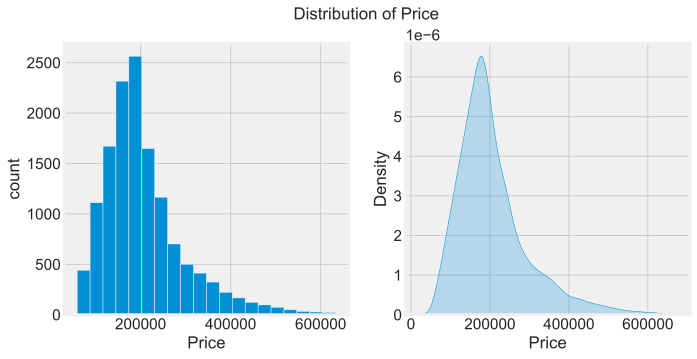

In [627]:
plt.figure(figsize = (10, 5))

plt.subplot(121)
df['Price'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('Price')

plt.subplot(122)
sns.kdeplot(df['Price'], shade=True, legend=False)
plt.xlabel('Price')

plt.suptitle('Distribution of Price')
plt.show()

In [628]:
target_mean = round(df['Price'].mean(), 2)
target_median = df['Price'].median()
target_mode = df['Price'].mode()[0]
target_mode

71319.375

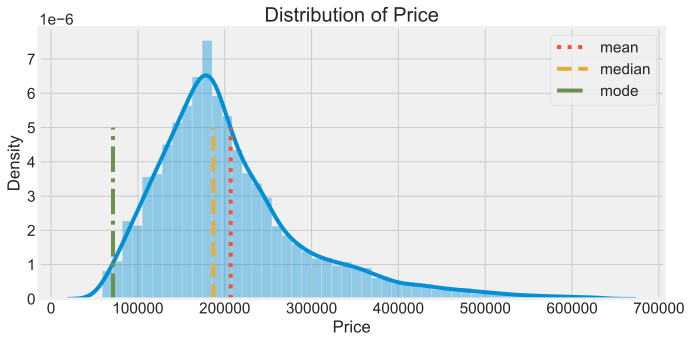

In [629]:
plt.figure(figsize = (10, 5))

sns.distplot(df['Price'], bins=50)

y = np.linspace(0, 0.000005, 10)
plt.plot([target_mean] * 10, y, label='mean', linestyle=':', linewidth=4)
plt.plot([target_median] * 10, y, label='median', linestyle='--', linewidth=4)
plt.plot([target_mode] * 10, y, label='mode', linestyle='-.', linewidth=4)

plt.title('Distribution of Price')
plt.legend()
plt.show()

In [630]:
df['Price'].value_counts()

168154.875000    4
179230.703125    4
271387.125000    4
260422.390625    4
286609.781250    4
                ..
267866.062500    1
201412.156250    1
331938.906250    1
209555.000000    1
559215.437500    1
Name: Price, Length: 9996, dtype: int64

Количественные признаки

In [631]:
df.dtypes

DistrictId             int16
Rooms                float32
Square               float32
LifeSquare           float32
KitchenSquare        float32
Floor                   int8
HouseFloor           float32
HouseYear              int16
Ecology_1            float32
Ecology_2           category
Ecology_3           category
Social_1                int8
Social_2               int16
Social_3                int8
Healthcare_1         float32
Healthcare_2            int8
Shops_1                 int8
Shops_2             category
Price                float32
LifeSquare_nan          int8
Healthcare_1_nan        int8
Ecology_2_index        int16
Ecology_3_index        int16
Shops_2_index          int16
dtype: object

In [632]:
df_num_features = df.select_dtypes(include=['float64', 'float32', 'float16', 'int16', 'int8'])
df_num_features.drop('Price', axis=1, inplace=True)

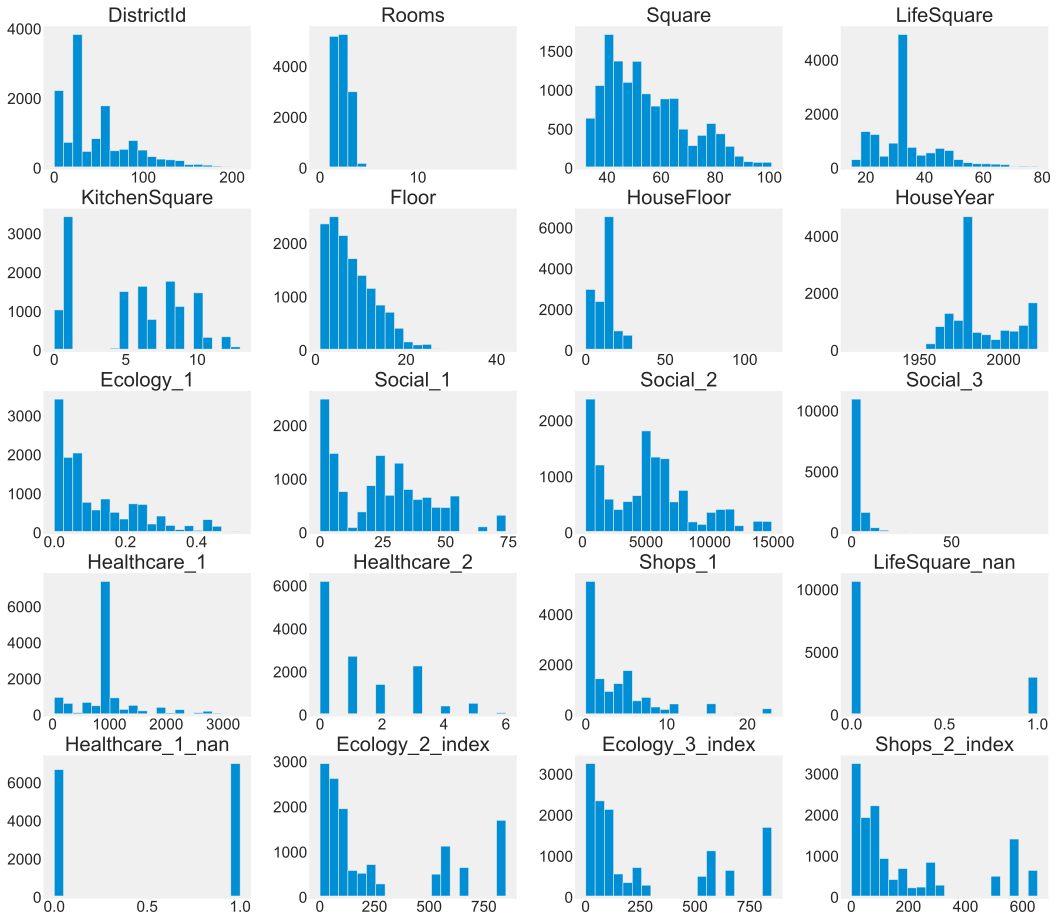

In [633]:
df_num_features.hist(figsize=(16, 16), bins=20, grid=False);

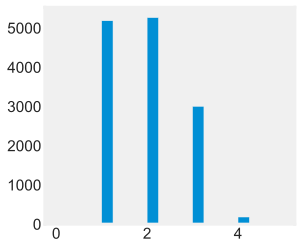

In [634]:
df.loc[df['Rooms'] > 5, 'Rooms'] = df['Rooms'].median()
df['Rooms'].hist(figsize=(4, 4), bins=20, grid=False);

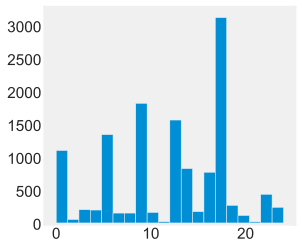

In [635]:
df[df['HouseFloor'] < 25]['HouseFloor'].hist(figsize=(4, 4), bins=20, grid=False);

In [636]:
df.loc[df['HouseFloor'] > 25, 'HouseFloor'] = df['HouseFloor'].median()

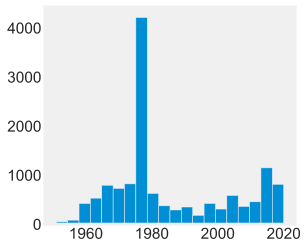

In [637]:
df[df['HouseYear'] > 1950]['HouseYear'].hist(figsize=(4, 4), bins=20, grid=False);

In [638]:
df = df[df['HouseYear'] > 1950]

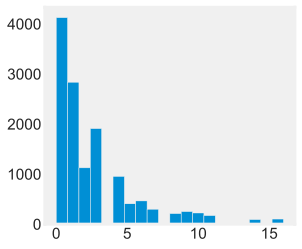

In [639]:
df[df['Social_3'] < 17]['Social_3'].hist(figsize=(4, 4), bins=20, grid=False);

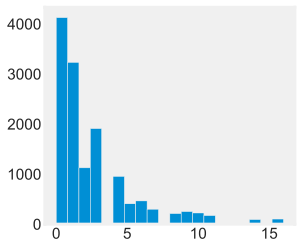

In [640]:
df.loc[df['Social_3'] > 17, 'Social_3'] = df['Social_3'].median()
df['Social_3'].hist(figsize=(4, 4), bins=20, grid=False);

новый признак возраст дома

In [641]:
df['Age'] = 2020 - df['HouseYear']
df.head()

DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  HouseFloor  \
0          27    3.0  52.513309   32.781261           10.0      4        10.0   
1          27    3.0  52.513309   32.781261           10.0      4        10.0   
2          27    1.0  44.203945   32.781261            0.0      2         0.0   
3          27    1.0  44.203945   32.781261            0.0      2         0.0   
4          27    2.0  58.783661   55.441257           11.0     13        12.0   

   HouseYear  Ecology_1 Ecology_2  ... Healthcare_2  Shops_1  Shops_2  \
0       2014   0.075424         B  ...            0        0        B   
1       2014   0.075424         B  ...            0        0        B   
2       1977   0.072158         B  ...            0        0        A   
3       1977   0.072158         B  ...            0        0        A   
4       1977   0.011654         B  ...            0        0        B   

           Price  LifeSquare_nan  Healthcare_1_nan  Ecology_2_index  \
0  305018.875000               1                 1              851   
1  305018.875000               1                 1              851   
2  135466.562500               1                 1              851   
3  135466.562500               1                 1              851   
4  138396.984375               0                 1              851   

  Ecology_3_index  Shops_2_index  Age  
0             851            266    6  
1             851            585    6  
2             851            266   43  
3             851            585   43  
4             851            266   43  

[5 rows x 25 columns]

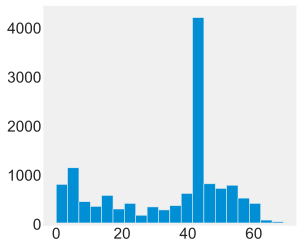

In [642]:
df['Age'].hist(figsize=(4, 4), bins=20, grid=False);

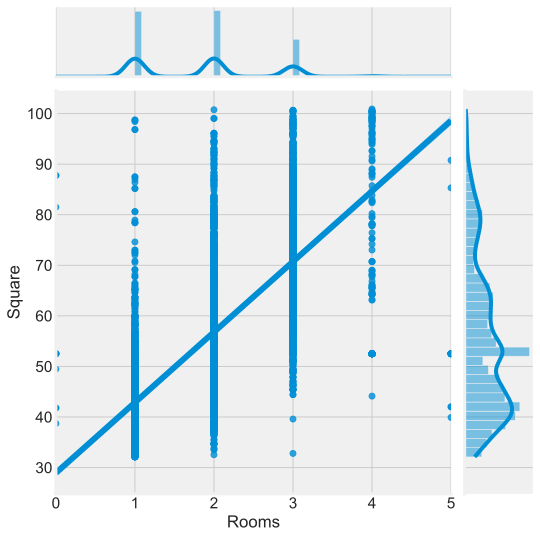

In [643]:
grid = sns.jointplot(df['Rooms'], df['Square'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

матрица корреляций

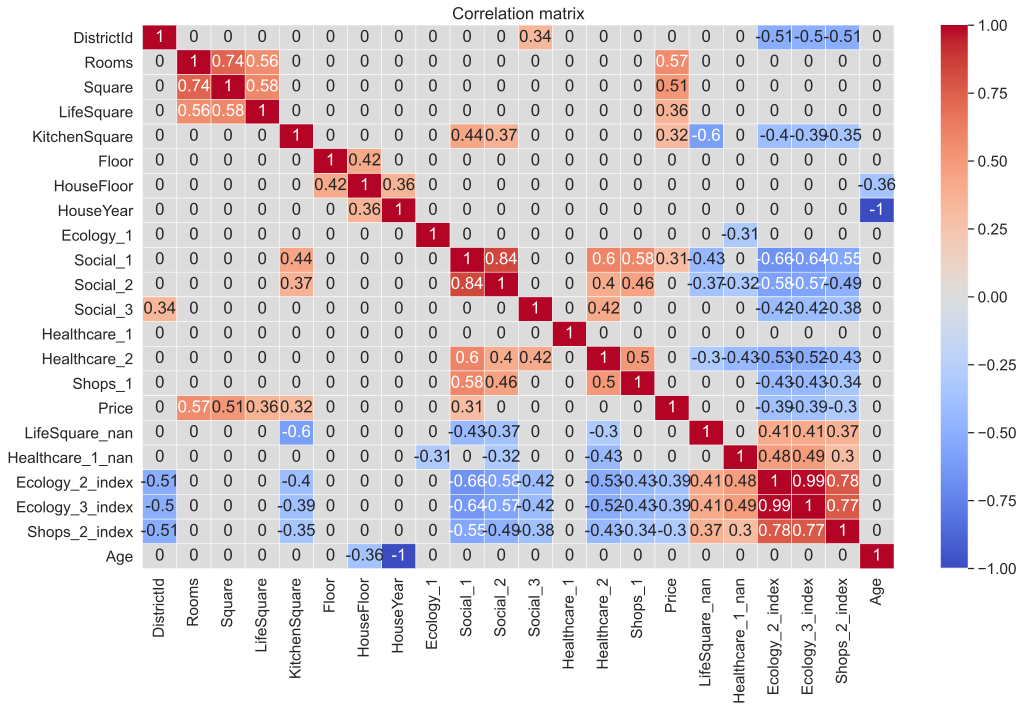

In [644]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.4)

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

наибольшая  корреляция предсказуемо у количества комнат Rooms и общей площади помещения Square, а также у признаков Social_1 и Social_2 между собой

# Анализ зависимости таргета от фичей

In [645]:
df.head(1)

DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  HouseFloor  \
0          27    3.0  52.513309   32.781261           10.0      4        10.0   

   HouseYear  Ecology_1 Ecology_2  ... Healthcare_2  Shops_1  Shops_2  \
0       2014   0.075424         B  ...            0        0        B   

        Price  LifeSquare_nan  Healthcare_1_nan  Ecology_2_index  \
0  305018.875               1                 1              851   

  Ecology_3_index  Shops_2_index  Age  
0             851            266    6  

[1 rows x 25 columns]

In [646]:
grid = sns.jointplot(df['Rooms'], df['Price'], kind='reg') #цена довольно сильно линейно зависит от количества комнат
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

неколичественные признаки

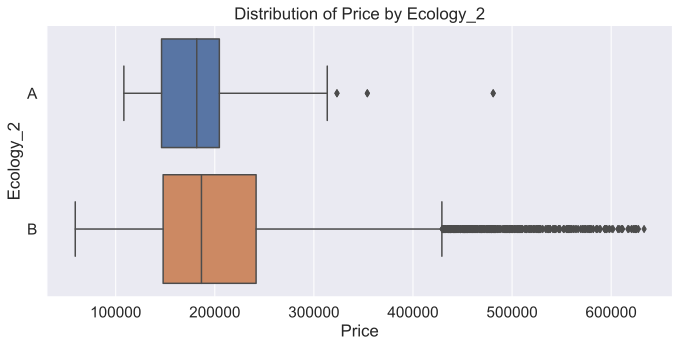

In [647]:
plt.figure(figsize=(10, 5))

sns.boxplot(df['Price'], df['Ecology_2'], whis=2) #Ecology_2 не сильно влияет на среднюю стоимость

plt.xlabel('Price')
plt.ylabel('Ecology_2')
plt.title('Distribution of Price by Ecology_2')
plt.show()

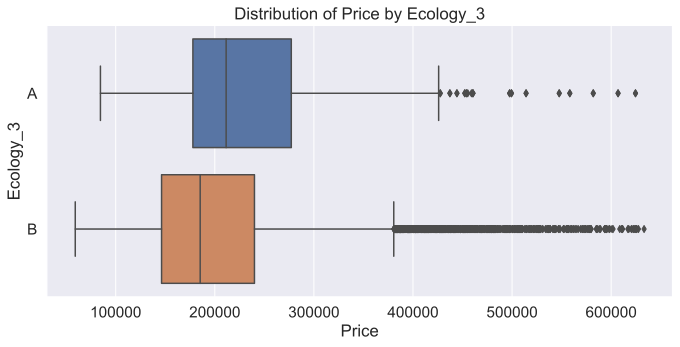

In [648]:
plt.figure(figsize=(10, 5))

sns.boxplot(df['Price'], df['Ecology_3'], whis=1.5) #Со значением A параметра Ecology_3 чуть подороже

plt.xlabel('Price')
plt.ylabel('Ecology_3')
plt.title('Distribution of Price by Ecology_3')
plt.show()

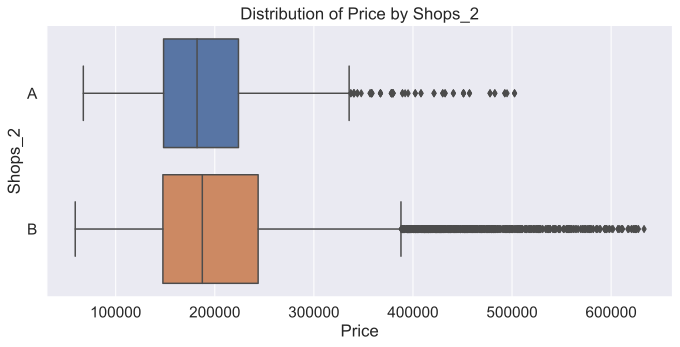

In [649]:
plt.figure(figsize=(10, 5))

sns.boxplot(df['Price'], df['Shops_2'], whis=1.5) #также приактически не влияет

plt.xlabel('Price')
plt.ylabel('Shops_2')
plt.title('Distribution of Price by Shops_2')
plt.show()

In [650]:
df.to_csv(PREPARED_DATASET_PATH, index=False, encoding='utf-8', sep=';')

In [651]:
X = df.drop(columns='Price')
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=100, )

In [652]:
X_train.columns.tolist()

['DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Healthcare_2',
 'Shops_1',
 'Shops_2',
 'LifeSquare_nan',
 'Healthcare_1_nan',
 'Ecology_2_index',
 'Ecology_3_index',
 'Shops_2_index',
 'Age']

In [656]:
feature_names = ['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear', 
                 'Ecology_1', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 'Healthcare_2', 'Shops_1','Ecology_2_index', 
                 'Ecology_3_index', 'Shops_2_index', 'Age']
target_name = 'Price'

In [657]:
X_train = X_train[feature_names]
X_test = X_test[feature_names]

X_train.head()

DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
5676           23    1.0  34.670830   32.781261            0.0      4   
9127           21    3.0  52.513309   60.285603            6.0     13   
10316          53    2.0  67.773560   44.877071           12.0      6   
9270           21    1.0  34.884975   20.418282            5.0      3   
4269           45    1.0  41.580055   32.781261           10.0     11   

       HouseFloor  HouseYear  Ecology_1  Social_1  Social_2  Social_3  \
5676          0.0       1977   0.005767         1       388       0.0   
9127         12.0       2011   0.194489        47      8004       3.0   
10316        24.0       2018   0.049637        34      7759       0.0   
9270          5.0       1965   0.034331        25      5487       3.0   
4269         20.0       2017   0.195781        23      5212       6.0   

       Healthcare_1  Healthcare_2  Shops_1  Ecology_2_index  Ecology_3_index  \
5676          900.0             0        0              565              565   
9127          125.0             3        5              165              165   
10316         229.0             1        3              174              174   
9270          900.0             0        4              165              165   
4269          900.0             3        2              116              116   

       Shops_2_index  Age  
5676             563   43  
9127             165    9  
10316            174    2  
9270             165   55  
4269             116    3

In [658]:
feature_names_for_stand = X_train.select_dtypes(include=['float64', 'float32', 'float16', 'int16', 'int8']).columns.tolist()
feature_names_for_stand

['DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Healthcare_2',
 'Shops_1',
 'Ecology_2_index',
 'Ecology_3_index',
 'Shops_2_index',
 'Age']

In [659]:
scaler = StandardScaler()

stand_features_train = scaler.fit_transform(X_train[feature_names_for_stand])
stand_features_test = scaler.transform(X_test[feature_names_for_stand])

In [660]:
X_train[feature_names_for_stand] = stand_features_train
X_test[feature_names_for_stand] = stand_features_test

In [661]:
X_train.head()

DistrictId     Rooms    Square  LifeSquare  KitchenSquare     Floor  \
5676    -0.639132 -1.073540 -1.343857   -0.148631      -1.470806 -0.857976   
9127    -0.689119  1.395927 -0.164676    2.289281       0.144424  0.880648   
10316    0.110681  0.161194  0.843850    0.923509       1.759654 -0.471615   
9270    -0.689119 -1.073540 -1.329705   -1.244453      -0.124781 -1.051156   
4269    -0.089269 -1.073540 -0.887237   -0.148631       1.221244  0.494287   

       HouseFloor  HouseYear  Ecology_1  Social_1  Social_2  Social_3  \
5676    -1.926952  -0.489885  -0.959604 -1.255184 -1.318360 -0.814359   
9127    -0.059097   1.423400   0.653182  1.233319  0.829983  0.179294   
10316    1.808757   1.817312  -0.584699  0.530046  0.760873 -0.814359   
9270    -1.148679  -1.165162  -0.715500  0.043165  0.119980  0.179294   
4269     1.186139   1.761039   0.664222 -0.065030  0.042408  1.172948   

       Healthcare_1  Healthcare_2   Shops_1  Ecology_2_index  Ecology_3_index  \
5676      -0.126911     -0.846813 -0.842832         1.026241         1.029873   
9127      -1.548199      1.169409  0.248391        -0.355573        -0.342939   
10316     -1.357471     -0.174739 -0.188098        -0.324483        -0.312051   
9270      -0.126911     -0.846813  0.030147        -0.355573        -0.342939   
4269      -0.126911      1.169409 -0.406343        -0.524846        -0.511109   

       Shops_2_index       Age  
5676        1.837269  0.489885  
9127       -0.102141 -1.423400  
10316      -0.058285 -1.817312  
9270       -0.102141  1.165162  
4269       -0.340912 -1.761039

In [662]:
X_train.describe()

DistrictId         Rooms        Square    LifeSquare  KitchenSquare  \
count  9.100000e+03  9.100000e+03  9.100000e+03  9.100000e+03   9.100000e+03   
mean   2.008406e-16 -1.809054e-16  1.582739e-16  3.890234e-16  -1.568465e-16   
std    1.000055e+00  1.000055e+00  1.000055e+00  1.000055e+00   1.000055e+00   
min   -1.213988e+00 -2.308273e+00 -1.513411e+00 -1.709766e+00  -1.470806e+00   
25%   -6.391318e-01 -1.073540e+00 -8.280537e-01 -5.488335e-01  -1.201601e+00   
50%   -4.141879e-01  1.611938e-01 -1.646757e-01 -1.486309e-01   1.444240e-01   
75%    4.605939e-01  1.611938e-01  6.146692e-01  4.191694e-01   6.828341e-01   
max    4.009709e+00  3.865395e+00  3.016489e+00  3.893530e+00   2.028859e+00   

              Floor    HouseFloor     HouseYear     Ecology_1      Social_1  \
count  9.100000e+03  9.100000e+03  9.100000e+03  9.100000e+03  9.100000e+03   
mean   7.666639e-17 -5.543795e-17  2.470045e-15 -1.163477e-16  6.453934e-17   
std    1.000055e+00  1.000055e+00  1.000055e+00  1.000055e+00  1.000055e+00   
min   -1.437517e+00 -1.926952e+00 -1.952986e+00 -1.008891e+00 -1.309282e+00   
25%   -8.579759e-01 -5.260611e-01 -6.024314e-01 -7.226596e-01 -9.846946e-01   
50%   -2.784346e-01 -5.909741e-02 -4.898852e-01 -3.612985e-01 -1.093253e-02   
75%    6.874677e-01  7.191753e-01  9.169423e-01  6.044238e-01  6.382422e-01   
max    6.482881e+00  1.964412e+00  1.929858e+00  3.450899e+00  2.693962e+00   

           Social_2      Social_3  Healthcare_1  Healthcare_2       Shops_1  \
count  9.100000e+03  9.100000e+03  9.100000e+03  9.100000e+03  9.100000e+03   
mean   3.418511e-17  2.148343e-16  1.700990e-16  1.005899e-15 -1.629893e-16   
std    1.000055e+00  1.000055e+00  1.000055e+00  1.000055e+00  1.000055e+00   
min   -1.353338e+00 -8.143595e-01 -1.722421e+00 -8.468135e-01 -8.428316e-01   
25%   -9.866307e-01 -8.143595e-01 -1.269109e-01 -8.468135e-01 -8.428316e-01   
50%    6.299968e-02 -4.831415e-01 -1.269109e-01 -1.747393e-01 -1.880980e-01   
75%    4.751228e-01  1.792945e-01 -1.269109e-01  4.973349e-01  2.483910e-01   
max    2.772970e+00  4.485128e+00  4.274497e+00  3.185632e+00  4.176792e+00   

       Ecology_2_index  Ecology_3_index  Shops_2_index           Age  
count     9.100000e+03     9.100000e+03   9.100000e+03  9.100000e+03  
mean     -3.196466e-17     1.744392e-16  -5.534035e-17  7.551957e-17  
std       1.000055e+00     1.000055e+00   1.000055e+00  1.000055e+00  
min      -9.221171e-01    -9.057923e-01  -9.012943e-01 -1.929858e+00  
25%      -7.260723e-01    -7.376227e-01  -7.258703e-01 -9.169423e-01  
50%      -5.421183e-01    -5.419969e-01  -4.529886e-01  4.898852e-01  
75%       1.026241e+00     1.029873e+00   3.900212e-01  6.024314e-01  
max       2.014238e+00     2.011434e+00   2.270956e+00  1.952986e+00

In [664]:
def evaluate_preds(true_values, pred_values, save=False):
    """Оценка качества модели и график preds vs true"""
    
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "RMSE:\t" + str(round(np.sqrt(mse(true_values, pred_values)), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3))
         )
    
    plt.figure(figsize=(8, 8))
    
    sns.scatterplot(x=pred_values, y=true_values)
    plt.plot([0, 500000], [0, 500000], linestyle='--', color='black')  # диагональ, где true_values = pred_values
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    
    if save == True:
        plt.savefig(REPORTS_FILE_PATH + 'report.png')
    plt.show()

In [665]:
#np.clip([-10, 1, 100000, 1000000], a_min=10000, a_max=500000)

array([ 10000,  10000, 100000, 500000])

R2:	0.561
RMSE:	59497.27
MSE:	3539925151.225


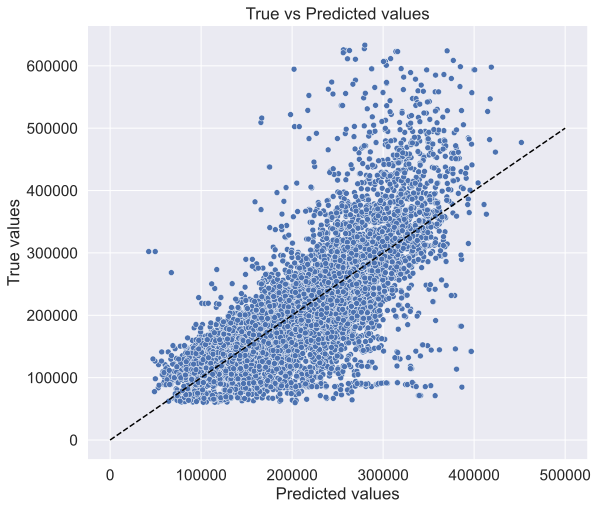

In [666]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_train_preds = lr_model.predict(X_train)
# Постпроцессинг
#y_train_preds = np.clip(y_train_preds, a_min=10000, a_max=500000)

evaluate_preds(y_train, y_train_preds)

R2:	0.741
RMSE:	45680.145
MSE:	2086675665.267


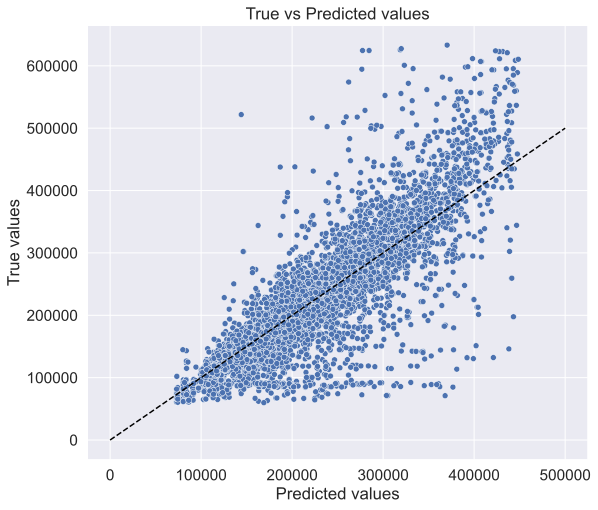

In [669]:
rf_model = RandomForestRegressor(criterion='mse',
                                 max_depth=20, # глубина дерева  
                                 min_samples_leaf=30, # минимальное кол-во наблюдений в листе дерева
                                 random_state=42, 
                                 n_estimators=100  # кол-во деревьев
                                 )

rf_model.fit(X_train, y_train)
y_train_preds = rf_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.676
RMSE:	50214.33
MSE:	2521478960.512


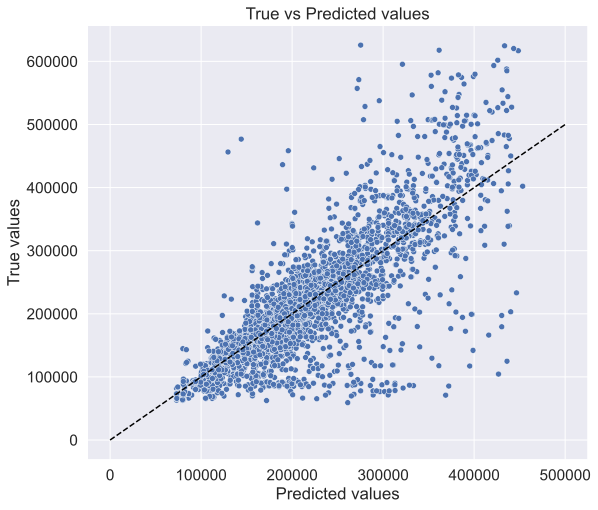

In [670]:
y_test_preds = rf_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)